## Sistema descrito en la seccion 4.1

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [ ]:
import numpy as np

class SistemaCuantico:
    def __init__(self, amplitudes):
        self.ket = np.array(amplitudes, dtype=complex)
        self.ket /= np.linalg.norm(self.ket)

    def probabilidad_en_posicion(self, posicion):
        if 0 <= posicion < len(self.ket):
            return np.abs(self.ket[posicion]) ** 2
        else:
            raise ValueError("Posicion fuera del rango del sistema.")

    def probabilidad_transicion(self, otro_ket):
        otro_ket = np.array(otro_ket, dtype=complex)
        otro_ket /= np.linalg.norm(otro_ket) 
        amplitud_transicion = np.vdot(self.ket, otro_ket) 
        return np.abs(amplitud_transicion) ** 2 

amplitudes_iniciales = [1+1j, 2-1j, 0, 1] 
sistema = SistemaCuantico(amplitudes_iniciales)

posicion = 1
print(f"Probabilidad de encontrar la particula en la posicion {posicion}:",
      sistema.probabilidad_en_posicion(posicion))

otro_estado = [0, 1, 1+1j, 0]
print("Probabilidad de transicion al segundo estado:", 
      sistema.probabilidad_transicion(otro_estado))


Probabilidad de encontrar la partícula en la posición 1: 0.6249999999999999
Probabilidad de transición al segundo estado: 0.20833333333333334


## Retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [ ]:
def probabilidad_transicion(ket, otro_ket):
        ket = np.array(ket, dtype=complex)
        ket /= np.linalg.norm(ket)
        
        otro_ket = np.array(otro_ket, dtype=complex)
        otro_ket /= np.linalg.norm(otro_ket) 
        
        amplitud_transicion = np.vdot(ket, otro_ket) 
        return np.abs(amplitud_transicion) ** 2 

ket_inicial = [1+1j, 2-1j, 0, 1] 
otro_ket = [0, 1, 1+1j, 0]
probabilidadTransicion = probabilidad_transicion(ket_inicial,otro_ket)
print(f"La probabilidad de transitar desde el ket inicial hasta el otro es: {probabilidadTransicion}")

La probabilidad de transitar desde el ket inicial hasta el otro es: 0.20833333333333334


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [1]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def valor_esperado(matriz, vector):
    producto = np.dot(matriz, vector)
    return np.vdot(producto, vector) if es_hermitiana(matriz) else "La matriz no es hermitiana"

def varianza(matriz, vector):
    if not es_hermitiana(matriz):
        return "La matriz no es hermitiana"
    
    valor_med = valor_esperado(matriz, vector)
    A_cuadrado = np.dot(matriz, matriz)
    valor_esperado_A2 = valor_esperado(A_cuadrado, vector)
    return valor_esperado_A2 - (valor_med**2)

A = np.array([[2, 1j], [-1j, 3]])
B = np.array([[1/np.sqrt(2)], [1/-np.sqrt(2)]])

print("Valor esperado:", valor_esperado(A, B))
print("Varianza:", varianza(A, B))



Valor esperado: (2.4999999999999996+0j)
Varianza: (1.25+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [3]:
import numpy as np

def es_hermitiana(matriz):
    return np.allclose(matriz, matriz.conj().T)

def valor_esperado(matriz, vector):
    producto = np.dot(matriz, vector)
    return np.vdot(producto, vector) if es_hermitiana(matriz) else "La matriz no es hermitiana"

def varianza(matriz, vector):
    if not es_hermitiana(matriz):
        return "La matriz no es hermitiana"
    valor_med = valor_esperado(matriz, vector)
    A_cuadrado = np.dot(matriz, matriz)
    valor_esperado_A2 = valor_esperado(A_cuadrado, vector)
    return valor_esperado_A2 - (valor_med**2)

def probabilidades_transicion(matriz, estado):
    if not es_hermitiana(matriz):
        return "La matriz no es hermitiana"
    
    estado = estado / np.linalg.norm(estado)

    valores_propios, vectores_propios = np.linalg.eigh(matriz)
    
    resultados = []
    for i in range(len(valores_propios)):
        valor = valores_propios[i]
        vector_propio = vectores_propios[:, i].reshape(-1, 1)

        amplitud = np.vdot(vector_propio, estado)
        probabilidad = np.abs(amplitud)**2
        resultados.append((valor, probabilidad, vector_propio))
    
    return resultados

A = np.array([[2, 1j], [-1j, 3]])
B = np.array([[1/np.sqrt(2)], [1/-np.sqrt(2)]])

print("Valor esperado:", valor_esperado(A, B))
print("Varianza:", varianza(A, B))
print("\nValores propios y probabilidades de transición:")

transiciones = probabilidades_transicion(A, B)
for i, (valor, prob, vector) in enumerate(transiciones):
    print(f"Valor propio {i+1}: {valor:.4f}")
    print(f"Probabilidad de pasar a ese estado: {prob:.4f}")
    print(f"Vector propio normalizado:\n{vector}\n")


Valor esperado: (2.4999999999999996+0j)
Varianza: (1.25+0j)

Valores propios y probabilidades de transición:
Valor propio 1: 1.3820
Probabilidad de pasar a ese estado: 0.5000
Vector propio normalizado:
[[-0.85065081+0.j        ]
 [ 0.        -0.52573111j]]

Valor propio 2: 3.6180
Probabilidad de pasar a ese estado: 0.5000
Vector propio normalizado:
[[0.52573111+0.j        ]
 [0.        -0.85065081j]]



4. Se considera la dinámica del sistema. Ahora con una serie de matrices en el sistema calcula el estado final a partir de un estado inicial.

In [2]:
import numpy as np

def aplicar_dinamica(un_list, estado_inicial):
    estado = estado_inicial
    for U in un_list:
        estado = np.dot(U, estado)
    return estado

U1 = np.array([[1, 0], [0, 1]])                     
U2 = np.array([[0, 1], [1, 0]])                    
U3 = np.array([[1, 0], [0, np.exp(1j * np.pi)]]) 

estado_inicial = np.array([[1], [0]])

Un = [U1, U2, U3]
estado_final = aplicar_dinamica(Un, estado_inicial)

print("Estado final:\n", estado_final)


Estado final:
 [[ 0.+0.0000000e+00j]
 [-1.+1.2246468e-16j]]


## Realice los siguientes problemas e incluyalos como ejemplos

4.3.1

In [4]:
import numpy as np

spin_up = np.array([[1], [0]])

Sx = 0.5 * np.array([[0, 1],
                     [1, 0]])

estado_aplicado = np.dot(Sx, spin_up)

autovalores, autovectores = np.linalg.eigh(Sx)

probabilidades = []
for i in range(autovectores.shape[1]):
    eigenvector = autovectores[:, i].reshape(2, 1)
    proyeccion = np.vdot(eigenvector, estado_aplicado)
    probabilidad = np.abs(proyeccion)**2
    probabilidades.append((autovalores[i], probabilidad, eigenvector))

for i, (val, prob, vec) in enumerate(probabilidades):
    print(f"Estado {i+1}:")
    print(f"  Autovalor: {val}")
    print(f"  Probabilidad de transicion: {prob}")
    print(f"  Vector propio:\n{vec}\n")


Estado 1:
  Autovalor: -0.5
  Probabilidad de transicion: 0.12499999999999997
  Vector propio:
[[-0.70710678]
 [ 0.70710678]]

Estado 2:
  Autovalor: 0.5
  Probabilidad de transicion: 0.12499999999999997
  Vector propio:
[[0.70710678]
 [0.70710678]]



Se aplica $S_x$ al estado inicial,   
Se hallan los autovalores y autovectores del observable $S_x$,  
Se calcula la probabilidad de transicion a cada autovector.  

3.3.2

Autovalores: [-0.5  0.5]
Probabilidades: [np.float64(0.12499999999999997), np.float64(0.12499999999999997)]
Valor esperado (media): 0.0


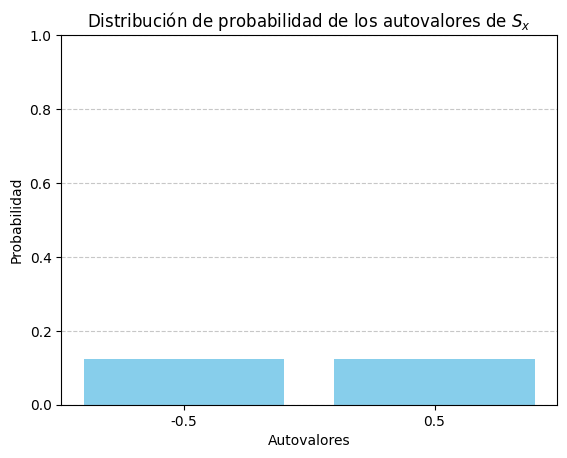

In [5]:
import numpy as np
import matplotlib.pyplot as plt

spin_up = np.array([[1], [0]])

Sx = 0.5 * np.array([[0, 1],
                     [1, 0]])

estado_aplicado = np.dot(Sx, spin_up)

autovalores, autovectores = np.linalg.eigh(Sx)

probabilidades = []
for i in range(autovectores.shape[1]):
    eigenvector = autovectores[:, i].reshape(2, 1)
    proyeccion = np.vdot(eigenvector, estado_aplicado)
    probabilidad = np.abs(proyeccion)**2
    probabilidades.append(probabilidad)

media = np.sum(autovalores * probabilidades)

print("Autovalores:", autovalores)
print("Probabilidades:", probabilidades)
print("Valor esperado (media):", media)

plt.bar([str(round(l, 2)) for l in autovalores], probabilidades, color='skyblue')
plt.title("Distribución de probabilidad de los autovalores de $S_x$")
plt.xlabel("Autovalores")
plt.ylabel("Probabilidad")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Se muestran los autovalores y sus probabilidades de ocurrencia,  
Se calcula el valor esperado (media),  
Se grfica la distribución de probabilidad de los autovalores.  

4.4.1

In [6]:
import numpy as np

def es_unitaria(U):
    identidad = np.eye(U.shape[0])
    return np.allclose(U.conj().T @ U, identidad)

U1 = np.array([[0, 1],
               [1, 0]])

U2 = (1 / np.sqrt(2)) * np.array([[1, 1],
                                  [1, -1]])

U3 = U1 @ U2

print("U1 es unitaria:", es_unitaria(U1))
print("U2 es unitaria:", es_unitaria(U2))
print("U1 * U2 es unitaria:", es_unitaria(U3))

print("Matriz U1 * U2:")
print(U3)


U1 es unitaria: True
U2 es unitaria: True
U1 * U2 es unitaria: True
Matriz U1 * U2:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Se verifica que:  

$𝑈_1$ es unitaria  

$𝑈_2$ es unitaria  

$𝑈_1$ $𝑈_2$ también es unitaria  

Esto indica que las matrices unitarias son cerradas bajo la multiplicación, como se menciona en el posultado 4.4.1

4.4.2

In [7]:
import numpy as np

U = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
], dtype=complex)

psi = np.array([1, 0, 0, 0], dtype=complex)

for _ in range(3):
    psi = U @ psi

print("Estado final:")
print(psi)

prob_3 = abs(psi[3])**2
print(f"\nProbabilidad de estar en la posición 3: {prob_3:.4f}")

Estado final:
[ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]

Probabilidad de estar en la posición 3: 0.0000


Se multiplica el vector estado por la matriz unitaria 𝑈 tres veces.  
Al final, se calcula el modulo al cuadrado del elemento en la posición 3 del vector ∣𝜓⟩ para obtener la probabilidad.

## Discusion del Ejercicio 4.5.2

### Enunciado:
> Escribe el vector de estado generico para un sistema de dos particulas con espin.  
> Generalizalo para un sistema con $ n $ particulas.  

---

### Estado de dos partículas con espin

Cada particula con espin (como un qubit) puede estar en una superposicion lineal de dos estados base:

$$
|\uparrow\rangle = |0\rangle, \quad |\downarrow\rangle = |1\rangle
$$

Para **dos particulas**, el espacio de Hilbert es:

$$
\mathcal{H}_2 = \mathbb{C}^2 \otimes \mathbb{C}^2 = \mathbb{C}^4
$$

El estado cuantico generico se expresa como:

$$
|\psi\rangle = c_{00}|00\rangle + c_{01}|01\rangle + c_{10}|10\rangle + c_{11}|11\rangle
$$

Donde $ c_{ij} \in \mathbb{C} $ y:

$$
|c_{00}|^2 + |c_{01}|^2 + |c_{10}|^2 + |c_{11}|^2 = 1
$$

---

### Generalización al caso de $ n $ partículas

Para un sistema de $ n $ partículas (es decir, $ n $ qubits), el espacio de estados es:

$$
\mathcal{H}_n = \mathbb{C}^{2^n}
$$

El estado general se puede escribir como:

$$
|\psi\rangle = \sum_{i_1, i_2, \dots, i_n \in \{0,1\}} c_{i_1 i_2 \dots i_n} |i_1 i_2 \dots i_n\rangle
$$

Con la condición de normalización:

$$
\sum |c_{i_1 i_2 \dots i_n}|^2 = 1
$$

---

### Importancia fisica y computacional

- **Modelo de qubits**: Esta estructura representa como se codifica y manipula la informacion en computacion cuantica.
- **Exponencialidad**: El espacio de estados crece exponencialmente con el numero de particulas. Un sistema de 300 qubits tiene mas estados posibles que atomos en el universo observable.
- **Entrelazamiento**: Muchos estados no se pueden escribir como productos de estados individuales, lo que permite fenomenos cuanticos unicos.
- **Implementación física**: Estos registros cuanticos son implementados en hardware mediante atomos, iones atrapados, fotones, superconductores, etc.


## Discusión del Ejercicio 4.5.3

### Enunciado:
> Asume el mismo escenario del Ejemplo 4.5.2 y considera el estado  
> $$
> |\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle
> $$
> ¿Es este estado separable?

---

### Contexto previo: ¿Que es un estado separable?

En sistemas cuanticos compuestos, un estado se considera **separable** si puede escribirse como el producto tensorial de estados individuales:

$$
|\psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle
$$

Por el contrario, si **no** se puede expresar de esta forma, el estado se llama **entrelazado** o **entangled**.

---

### Análisis del estado $ |\phi\rangle $

El estado propuesto es:

$$
|\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle
$$

Agrupando terminos comunes:

$$
|\phi\rangle = \left(|x_0\rangle + |x_1\rangle\right) \otimes |y_1\rangle
$$

Este estado **si** puede escribirse como producto tensorial:

- $ |\psi_1\rangle = |x_0\rangle + |x_1\rangle $
- $ |\psi_2\rangle = |y_1\rangle $

Por lo tanto:

$$
|\phi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle
$$

---

El estado $ |\phi\rangle $ **es separable**. No esta entrelazado, ya que puede expresarse como el producto tensorial de dos estados individuales, uno para cada subsistema.

Esto contrasta con el estado del Ejemplo 4.5.2:

$$
|\psi\rangle = |x_0\rangle \otimes |y_0\rangle + |x_1\rangle \otimes |y_1\rangle
$$

Ese estado **no** se puede expresar como producto tensorial de dos estados, por lo tanto es un **estado entrelazado**.

---

Este ejercicio ayuda a entender la diferencia entre:

- **Estados separables**: Describen sistemas no correlacionados, con evolución independiente.
- **Estados entrelazados**: Tienen correlaciones no clásicas que son fundamentales para algoritmos cuánticos, criptografía cuántica y teleportación.

---
